<a href="https://colab.research.google.com/github/mu20042006-cyber/Online-Learning-Analytics-EDA-PCA/blob/main/online_course_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# --- Data Handling ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.transforms as transforms
import warnings
warnings.filterwarnings('ignore')

from matplotlib.patches import Ellipse

from scipy import stats
from scipy.stats import ttest_ind, f_oneway

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [ ]:
df = pd.read_csv("/content/online_course_engagement_v5.csv")
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.189661,17.501015,2.956686,50.504203,20.372473,1,0
1,4326,Arts,29.129697,0.949412,5.049293,63.267924,64.941286,1,0
2,5849,Arts,86.417043,14.014453,1.832252,79.479229,61.244720,1,1
3,4992,Science,34.668974,16.927413,10.152430,59.276322,94.439492,0,1
4,3866,Programming,92.741137,16.547156,-0.170161,97.732338,19.161182,0,0


In [ ]:
df.shape

(9180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9180 entries, 0 to 9179
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9180 non-null   int64  
 1   CourseCategory         9180 non-null   object 
 2   TimeSpentOnCourse      8855 non-null   float64
 3   NumberOfVideosWatched  8852 non-null   float64
 4   NumberOfQuizzesTaken   8866 non-null   float64
 5   QuizScores             8845 non-null   float64
 6   CompletionRate         8905 non-null   float64
 7   DeviceType             9180 non-null   int64  
 8   CourseCompletion       9180 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 645.6+ KB


In [ ]:
df.describe()

,UserID,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
count,9180.000000,8855.000000,8852.000000,8866.000000,8845.000000,8905.000000,9180.000000,9180.000000
mean,4498.079521,50.059881,10.068489,5.106059,74.654922,50.344018,0.499782,0.396514
std,2594.259262,30.288243,6.281435,3.315441,15.277297,30.568998,0.500027,0.489200
min,1.000000,-74.585056,-14.559536,-9.852039,12.677481,-70.226347,0.000000,0.000000
25%,2255.750000,24.910918,4.718255,2.133913,62.023915,25.293253,0.000000,0.000000
50%,4482.500000,49.677878,10.143926,5.070705,74.723985,50.241008,0.000000,0.000000
75%,6747.250000,75.605157,15.249939,7.970332,87.233476,76.261798,1.000000,1.000000
max,9000.000000,172.536006,34.947621,19.885810,134.629006,171.182740,1.000000,1.000000


In [ ]:
df.nunique()

,0
UserID,8123
CourseCategory,5
TimeSpentOnCourse,8683
NumberOfVideosWatched,8680
NumberOfQuizzesTaken,8692
QuizScores,8671
CompletionRate,8729
DeviceType,2
CourseCompletion,2


In [ ]:
list(df.columns)

['UserID',
 'CourseCategory',
 'TimeSpentOnCourse',
 'NumberOfVideosWatched',
 'NumberOfQuizzesTaken',
 'QuizScores',
 'CompletionRate',
 'DeviceType',
 'CourseCompletion']

**MISSING** **VALUE**

In [ ]:
df.isnull().sum()

,0
UserID,0
CourseCategory,0
TimeSpentOnCourse,325
NumberOfVideosWatched,328
NumberOfQuizzesTaken,314
QuizScores,335
CompletionRate,275
DeviceType,0
CourseCompletion,0


In [ ]:
# Fill numeric missing values with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical missing values with mode
categorical_cols = df.select_dtypes(exclude=np.number).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [ ]:
df.isnull().sum()

,0
UserID,0
CourseCategory,0
TimeSpentOnCourse,0
NumberOfVideosWatched,0
NumberOfQuizzesTaken,0
QuizScores,0
CompletionRate,0
DeviceType,0
CourseCompletion,0


**DUBLICATE**

In [ ]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 180


In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

**OUTLIERS**

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
UserID,9000.0,4498.894556,2596.849433,1.000000,2251.750000,4483.500000,6751.250000,9000.000000
TimeSpentOnCourse,9000.0,50.049806,29.765127,-74.585056,25.780882,49.677878,74.602164,172.536006
NumberOfVideosWatched,9000.0,10.063898,6.177183,-14.559536,4.894254,10.143926,15.098618,34.947621
NumberOfQuizzesTaken,9000.0,5.104241,3.259687,-9.852039,2.198211,5.070705,7.927310,19.885810
QuizScores,9000.0,74.644780,15.010931,12.677481,62.494187,74.723985,86.676436,134.629006
CompletionRate,9000.0,50.248553,30.112377,-70.226347,25.864184,50.241008,75.192454,171.182740
DeviceType,9000.0,0.500667,0.500027,0.000000,0.000000,1.000000,1.000000,1.000000
CourseCompletion,9000.0,0.396444,0.489186,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
numeric_cols = df.select_dtypes(include=np.number).columns
print(f"outliers: {numeric_cols}")

outliers: Index(['UserID', 'TimeSpentOnCourse', 'NumberOfVideosWatched',
       'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate', 'DeviceType',
       'CourseCompletion'],
      dtype='object')


In [ ]:
# Detect outliers using IQR for numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column '{col}': {len(outliers)} outliers")


Column 'UserID': 0 outliers
Column 'TimeSpentOnCourse': 45 outliers
Column 'NumberOfVideosWatched': 26 outliers
Column 'NumberOfQuizzesTaken': 34 outliers
Column 'QuizScores': 46 outliers
Column 'CompletionRate': 30 outliers
Column 'DeviceType': 0 outliers
Column 'CourseCompletion': 0 outliers


In [ ]:
#Remove extreme outliers using IQR for numeric columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Column '{col}': {len(outliers)} outliers")

Column 'UserID': 0 outliers
Column 'TimeSpentOnCourse': 0 outliers
Column 'NumberOfVideosWatched': 0 outliers
Column 'NumberOfQuizzesTaken': 0 outliers
Column 'QuizScores': 0 outliers
Column 'CompletionRate': 0 outliers
Column 'DeviceType': 0 outliers
Column 'CourseCompletion': 0 outliers


In [ ]:
df['CourseCategory'] = df['CourseCategory'].astype(str).str.strip().str.lower()


In [ ]:
print("\nCleaned Data Info:")
print(df.info())


Cleaned Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 8817 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 8817 non-null   int64  
 1   CourseCategory         8817 non-null   object 
 2   TimeSpentOnCourse      8817 non-null   float64
 3   NumberOfVideosWatched  8817 non-null   float64
 4   NumberOfQuizzesTaken   8817 non-null   float64
 5   QuizScores             8817 non-null   float64
 6   CompletionRate         8817 non-null   float64
 7   DeviceType             8817 non-null   int64  
 8   CourseCompletion       8817 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 688.8+ KB
None


In [ ]:
df['CompletionRate'] = df['CompletionRate'].clip(0, 100)


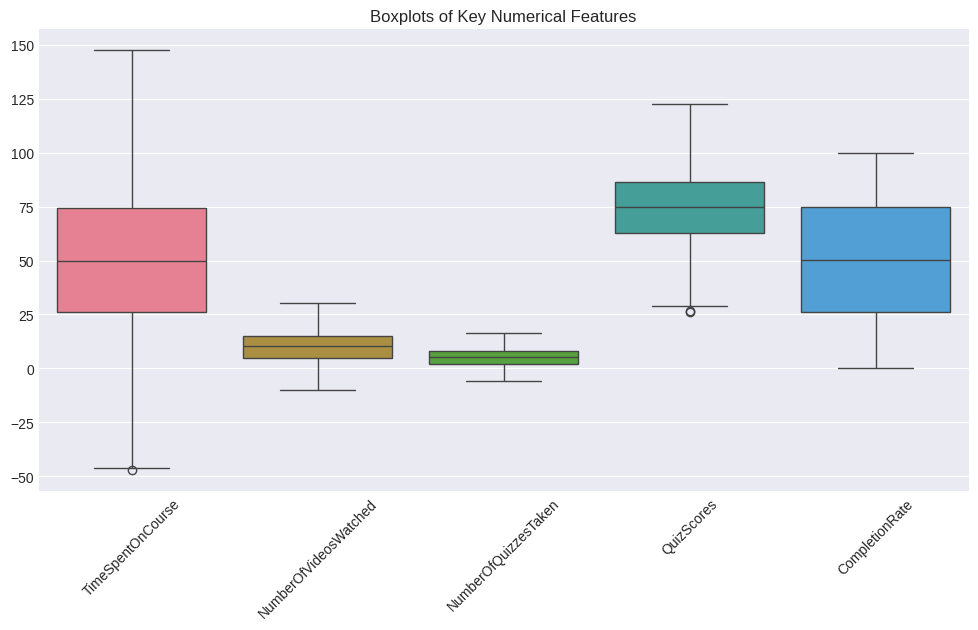

In [ ]:
features = [
    "TimeSpentOnCourse",
    "NumberOfVideosWatched",
    "NumberOfQuizzesTaken",
    "QuizScores",
    "CompletionRate"
]

plt.figure(figsize=(12,6))
sns.boxplot(data=df[features])
plt.title("Boxplots of Key Numerical Features")
plt.xticks(rotation=45)
plt.show()

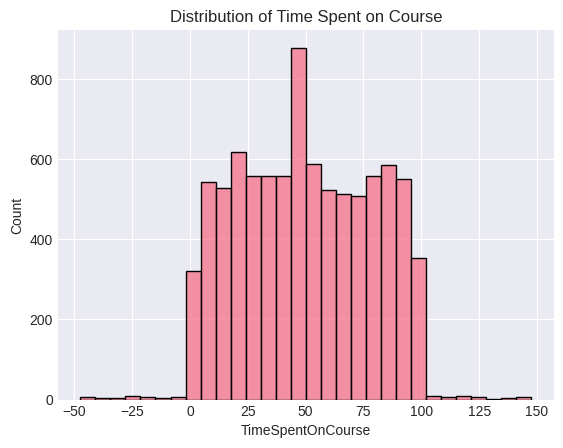

In [ ]:
plt.figure()
sns.histplot(df["TimeSpentOnCourse"], bins=30)
plt.title("Distribution of Time Spent on Course")
plt.show()



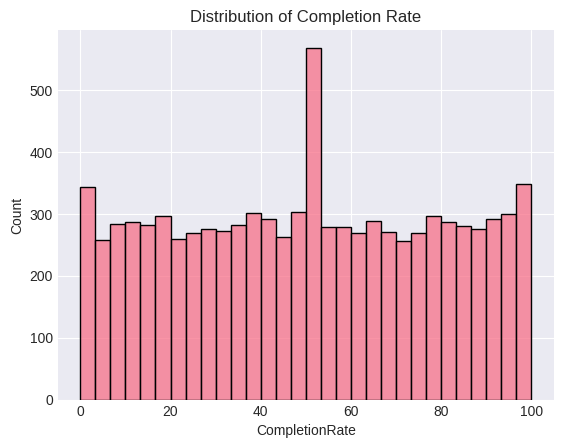

In [ ]:
sns.histplot(df['CompletionRate'], bins=30)
plt.title("Distribution of Completion Rate")
plt.show()


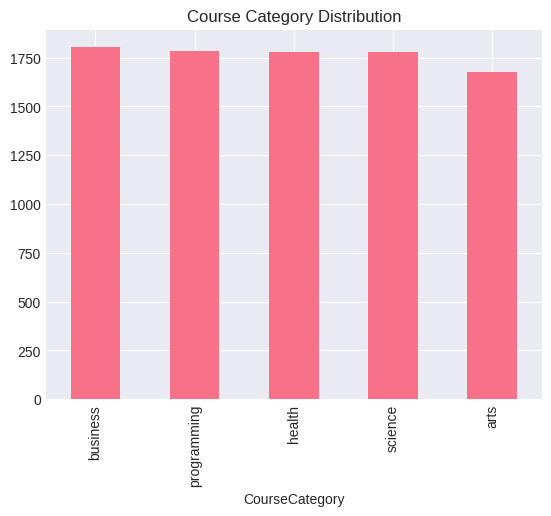

In [ ]:
plt.figure()
df["CourseCategory"].value_counts().plot(kind="bar")
plt.title("Course Category Distribution")
plt.show()


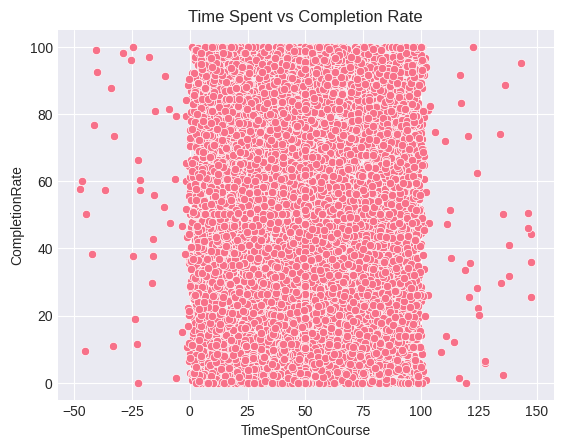

In [ ]:
plt.figure()
sns.scatterplot(x="TimeSpentOnCourse", y="CompletionRate", data=df)
plt.title("Time Spent vs Completion Rate")
plt.show()


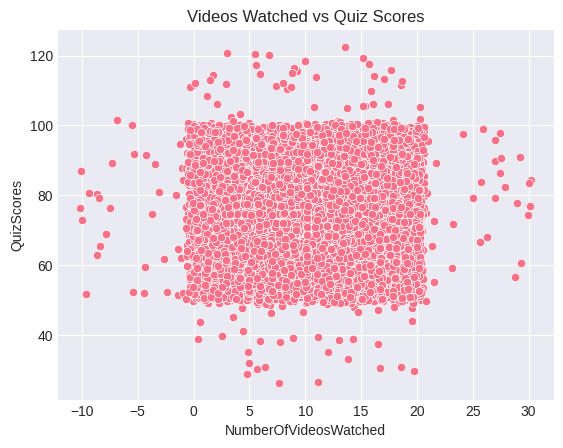

In [ ]:
plt.figure()
sns.scatterplot(x="NumberOfVideosWatched", y="QuizScores", data=df)
plt.title("Videos Watched vs Quiz Scores")
plt.show()


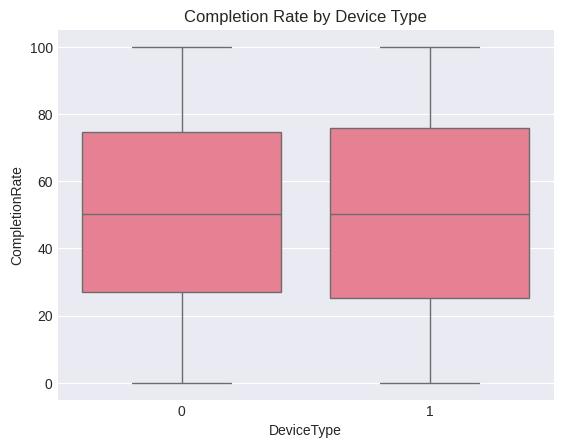

In [ ]:
plt.figure()
sns.boxplot(x="DeviceType", y="CompletionRate", data=df)
plt.title("Completion Rate by Device Type")
plt.show()


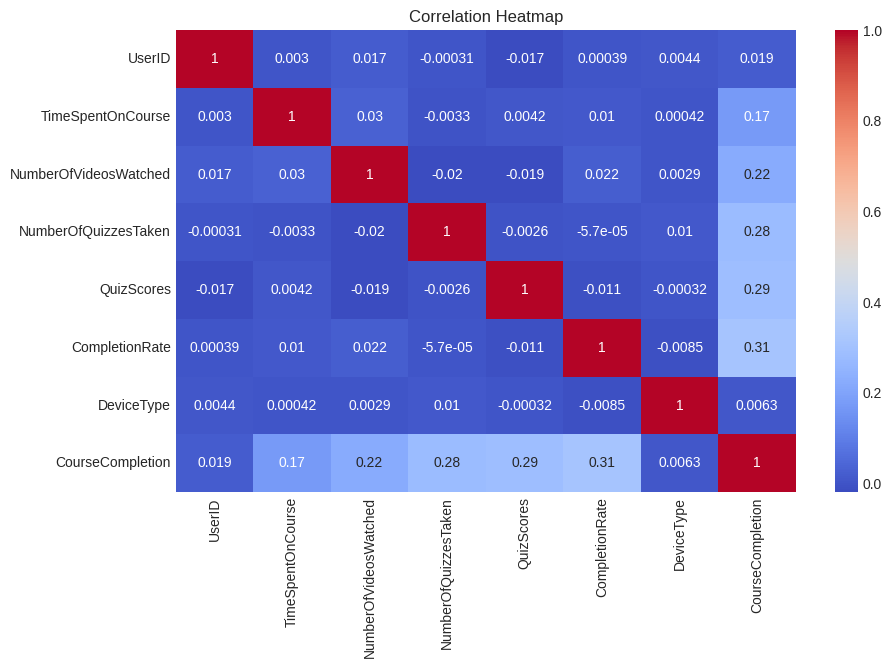

In [ ]:

numeric_df = df.select_dtypes(include=["int64", "float64"])


plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



**NEW** **FEATURES**

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
UserID,8817.0,4501.233866,2595.686347,1.000000,2260.000000,4484.000000,6754.000000,9000.000000
TimeSpentOnCourse,8817.0,50.127344,28.843713,-47.349064,25.931657,49.677878,74.595920,147.510545
NumberOfVideosWatched,8817.0,10.076553,6.066566,-10.148072,4.924029,10.143926,15.098378,30.228330
NumberOfQuizzesTaken,8817.0,5.101717,3.165131,-6.104095,2.214933,5.070705,7.921554,16.196667
QuizScores,8817.0,74.704085,14.491350,26.316536,62.589958,74.723985,86.589702,122.495558
CompletionRate,8817.0,50.230739,28.863837,0.000000,25.993365,50.241008,75.052480,100.000000
DeviceType,8817.0,0.499716,0.500028,0.000000,0.000000,0.000000,1.000000,1.000000
CourseCompletion,8817.0,0.397074,0.489319,0.000000,0.000000,0.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8817 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 8817 non-null   int64  
 1   CourseCategory         8817 non-null   object 
 2   TimeSpentOnCourse      8817 non-null   float64
 3   NumberOfVideosWatched  8817 non-null   float64
 4   NumberOfQuizzesTaken   8817 non-null   float64
 5   QuizScores             8817 non-null   float64
 6   CompletionRate         8817 non-null   float64
 7   DeviceType             8817 non-null   int64  
 8   CourseCompletion       8817 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 688.8+ KB


In [ ]:
df['AvgQuizScore'] = df['QuizScores'] / df['NumberOfQuizzesTaken']
df['AvgQuizScore'] = df['AvgQuizScore'].fillna(0)

df['EngagementLevel'] = df['TimeSpentOnCourse'] + df['NumberOfVideosWatched']

df['VideoTimeRatio'] = df['NumberOfVideosWatched'] / df['TimeSpentOnCourse']
df['VideoTimeRatio'] = df['VideoTimeRatio'].replace([np.inf, -np.inf], 0)
df['VideoTimeRatio'] = df['VideoTimeRatio'].fillna(0)

df['QuizTaken'] = np.where(df['NumberOfQuizzesTaken'] > 0, 1, 0)


In [ ]:
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion,AvgQuizScore,EngagementLevel,VideoTimeRatio,QuizTaken
0,5618,health,29.189661,17.501015,2.956686,50.504203,20.372473,1,0,17.081353,46.690677,0.599562,1
1,4326,arts,29.129697,0.949412,5.049293,63.267924,64.941286,1,0,12.530057,30.079109,0.032593,1
2,5849,arts,86.417043,14.014453,1.832252,79.479229,61.244720,1,1,43.377892,100.431496,0.162172,1
3,4992,science,34.668974,16.927413,10.152430,59.276322,94.439492,0,1,5.838634,51.596386,0.488258,1
4,3866,programming,92.741137,16.547156,-0.170161,97.732338,19.161182,0,0,-574.353669,109.288293,0.178423,0


**ENCODING**

In [ ]:
df = pd.get_dummies(df, columns=['CourseCategory'], drop_first=True)


In [ ]:
df[['CourseCategory_business',
    'CourseCategory_health',
    'CourseCategory_programming',
    'CourseCategory_science']] = \
df[['CourseCategory_business',
    'CourseCategory_health',
    'CourseCategory_programming',
    'CourseCategory_science']].astype(int)


In [ ]:
df.dtypes

,0
UserID,int64
TimeSpentOnCourse,float64
NumberOfVideosWatched,float64
NumberOfQuizzesTaken,float64
QuizScores,float64
CompletionRate,float64
DeviceType,int64
CourseCompletion,int64
AvgQuizScore,float64
EngagementLevel,float64


In [ ]:
df.columns

Index(['UserID', 'TimeSpentOnCourse', 'NumberOfVideosWatched',
       'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate', 'DeviceType',
       'CourseCompletion', 'AvgQuizScore', 'EngagementLevel', 'VideoTimeRatio',
       'QuizTaken', 'CourseCategory_business', 'CourseCategory_health',
       'CourseCategory_programming', 'CourseCategory_science'],
      dtype='object')

**SELECTION** **METHODS**

Filter

In [ ]:
X = df.drop(['UserID', 'CourseCompletion'], axis=1)
y = df['CourseCompletion']

In [ ]:
corr = df.corr()['CourseCompletion'].sort_values(ascending=False)
print(corr)


CourseCompletion              1.000000
CompletionRate                0.309890
QuizScores                    0.285738
NumberOfQuizzesTaken          0.276451
NumberOfVideosWatched         0.221079
EngagementLevel               0.213610
TimeSpentOnCourse             0.173085
QuizTaken                     0.095896
UserID                        0.019397
CourseCategory_programming    0.007166
DeviceType                    0.006255
CourseCategory_business       0.005216
CourseCategory_science       -0.006475
AvgQuizScore                 -0.014636
VideoTimeRatio               -0.017437
CourseCategory_health        -0.017555
Name: CourseCompletion, dtype: float64


In [ ]:
selected_filter = corr[abs(corr) > 0.1].index
selected_filter = selected_filter.drop('CourseCompletion')

print("Selected by Filter Method:")
print(selected_filter)


Selected by Filter Method:
Index(['CompletionRate', 'QuizScores', 'NumberOfQuizzesTaken',
       'NumberOfVideosWatched', 'EngagementLevel', 'TimeSpentOnCourse'],
      dtype='object')


Lasso

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_scaled, y)


Lasso(alpha=0.01)

In [ ]:
selected_lasso = X.columns[lasso.coef_ != 0]

print("Selected by Lasso:")
print(selected_lasso)


Selected by Lasso:
Index(['NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores',
       'CompletionRate', 'EngagementLevel', 'CourseCategory_health'],
      dtype='object')


RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)


In [ ]:
rfe = RFE(estimator=model, n_features_to_select=5)
rfe.fit(X, y)


RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

In [ ]:
selected_rfe = X.columns[rfe.support_]

print("Selected by RFE:")
print(selected_rfe)


Selected by RFE:
Index(['NumberOfVideosWatched', 'NumberOfQuizzesTaken', 'QuizScores',
       'CourseCategory_health', 'CourseCategory_science'],
      dtype='object')


In [ ]:
final_features = list(selected_rfe)
final_features.append('CourseCompletion')

df = df[final_features]


In [ ]:
df.head()

,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CourseCategory_health,CourseCategory_science,CourseCompletion
0,17.501015,2.956686,50.504203,1,0,0
1,0.949412,5.049293,63.267924,0,0,0
2,14.014453,1.832252,79.479229,0,0,1
3,16.927413,10.152430,59.276322,0,1,1
4,16.547156,-0.170161,97.732338,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8817 entries, 0 to 8999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NumberOfVideosWatched   8817 non-null   float64
 1   NumberOfQuizzesTaken    8817 non-null   float64
 2   QuizScores              8817 non-null   float64
 3   CourseCategory_health   8817 non-null   int64  
 4   CourseCategory_science  8817 non-null   int64  
 5   CourseCompletion        8817 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 482.2 KB


## Probability & Hypothesis Testing


**Probability**

In [ ]:
p_completed = df['CourseCompletion'].mean()
p_completed


np.float64(0.39707383463763185)

In [ ]:
p_high_score = (df['QuizScores'] > 70).mean()
p_high_score

np.float64(0.6075762731087672)

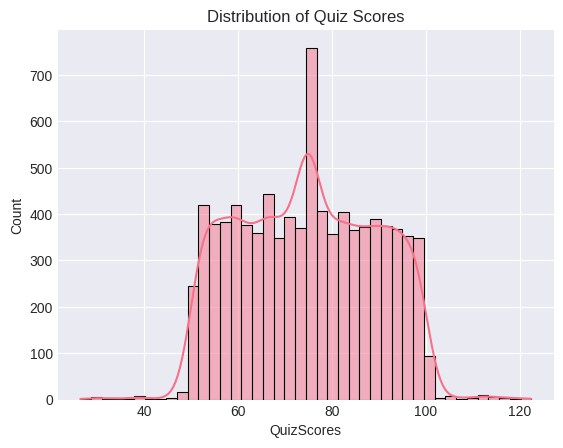

In [ ]:
sns.histplot(df['QuizScores'], kde=True)
plt.title("Distribution of Quiz Scores")
plt.show()

**T-test**

In [ ]:
from scipy.stats import ttest_ind

completed = df[df['CourseCompletion'] == 1]['QuizScores']
not_completed = df[df['CourseCompletion'] == 0]['QuizScores']

t_stat, p_value = ttest_ind(completed, not_completed)
t_stat, p_value

(np.float64(27.994583046459525), np.float64(2.7515995188934715e-165))

p>0,05 no relationship

p<0,05 reltionship

**Chi-Square test**

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['CourseCategory_health'], df['CourseCompletion'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p


(np.float64(2.6286847850355044), np.float64(0.10494861524485093))

fail to reject H0

**ANOVA (F-TEST)
**

In [ ]:
# Create quiz activity groups
df['QuizGroup'] = pd.cut(
    df['NumberOfQuizzesTaken'],
    bins=[-1, 3, 6, df['NumberOfQuizzesTaken'].max()],
    labels=['Low', 'Medium', 'High']
)


In [ ]:
low = df[df['QuizGroup'] == 'Low']['QuizScores']
medium = df[df['QuizGroup'] == 'Medium']['QuizScores']
high = df[df['QuizGroup'] == 'High']['QuizScores']



In [ ]:
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(low, medium, high)
f_stat, p_value



(np.float64(2.224163965606742), np.float64(0.10821866405862071))

## Dimensionality Reduction (PCA)


In [ ]:
# prepares the data for PCA by selecting numerical features and standardizing them.
X_pca_initial = df.drop('CourseCompletion', axis=1).select_dtypes(include=np.number)

scaler = StandardScaler()
X_scaled_pca = scaler.fit_transform(X_pca_initial)

print("Shape of X_pca_initial:", X_pca_initial.shape)
print("Shape of X_scaled_pca:", X_scaled_pca.shape)

Shape of X_pca_initial: (8817, 5)
Shape of X_scaled_pca: (8817, 5)


In [ ]:
# applies Principal Component Analysis (PCA) to the standardized data and calculates the explained variance ratio for each component.
from sklearn.decomposition import PCA

pca = PCA()
X_pca = pca.fit_transform(X_scaled_pca)
explained_variance = pca.explained_variance_ratio_

print("Shape of X_pca:", X_pca.shape)
print("Explained variance ratio:", explained_variance)

Shape of X_pca: (8817, 5)
Explained variance ratio: [0.25082929 0.2052903  0.20041396 0.19413723 0.14932922]


In [ ]:
# calculates and prints the cumulative explained variance ratio to understand the total variance captured by the principal components.
cumulative_variance = np.cumsum(explained_variance)

print("Individual Explained variance ratio:", explained_variance)
print("Cumulative variance ratio:", cumulative_variance)

Individual Explained variance ratio: [0.25082929 0.2052903  0.20041396 0.19413723 0.14932922]
Cumulative variance ratio: [0.25082929 0.45611959 0.65653355 0.85067078 1.        ]


### Visualize the PCA

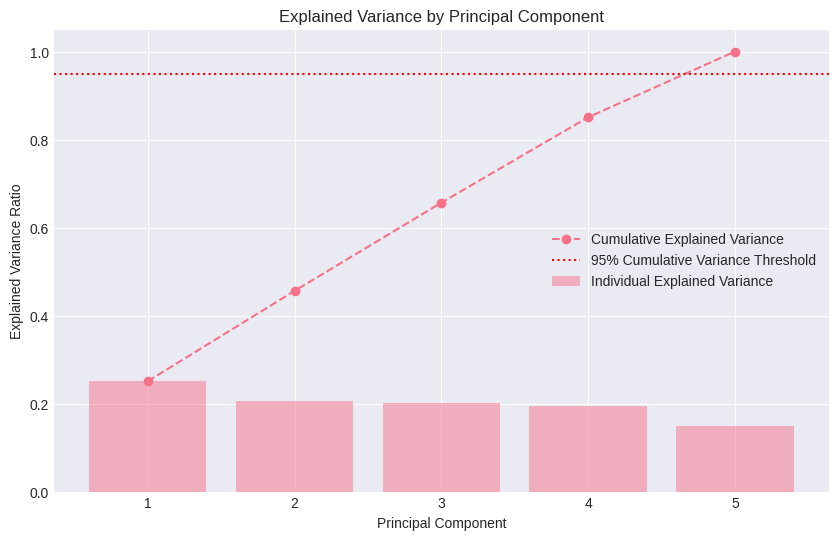

In [ ]:
# visualizes the explained variance using a scree plot, showing individual and cumulative explained variance to help determine the optimal number of components.
plt.figure(figsize=(10, 6))

plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', label='Cumulative Explained Variance')

plt.axhline(y=0.95, color='r', linestyle=':', label='95% Cumulative Variance Threshold')

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.title('Explained Variance by Principal Component')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(range(1, len(explained_variance) + 1))
plt.show()

In [ ]:
# determines the number of components required to explain 95% of the variance and transforms the scaled data into the final principal components.
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

pca_final = PCA(n_components=n_components_95)
X_pca_final = pca_final.fit_transform(X_scaled_pca)

print(f"Number of components to explain 95% variance: {n_components_95}")
print("Shape of X_pca_final:", X_pca_final.shape)

Number of components to explain 95% variance: 5
Shape of X_pca_final: (8817, 5)


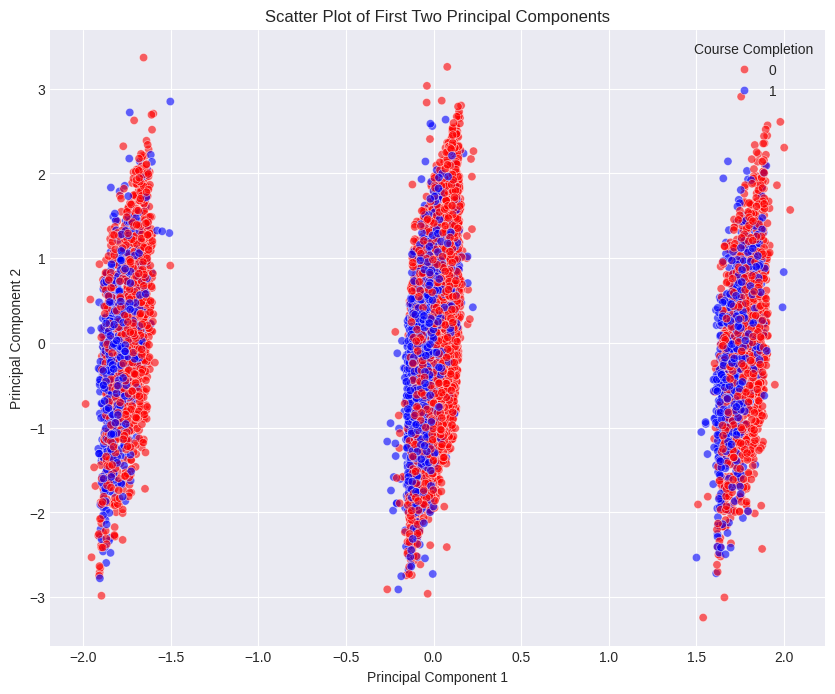

In [ ]:
# visualizes the first two principal components in a scatter plot, colored by Course Completion, to observe patterns in the reduced-dimension space.
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_pca_final[:, 0],
    y=X_pca_final[:, 1],
    hue=df['CourseCompletion'],
    palette=['red', 'blue'],
    alpha=0.6
)
plt.title('Scatter Plot of First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Course Completion')
plt.grid(True)
plt.show()

In [ ]:
# Impact of PCA on Features
loadings = pca_final.components_
feature_names = X_pca_initial.columns

pca_loadings_df = pd.DataFrame(
    loadings.T,
    columns=[f'PC{i+1}' for i in range(pca_final.n_components_)],
    index=feature_names
)

print("Principal Component Loadings:")
display(pca_loadings_df)

Principal Component Loadings:


,PC1,PC2,PC3,PC4,PC5
NumberOfVideosWatched,-0.003624,0.733830,-0.034384,0.675959,0.058125
NumberOfQuizzesTaken,-0.015310,-0.512690,-0.682013,0.521282,0.006130
QuizScores,-0.078102,-0.442399,0.729048,0.516359,0.006748
CourseCategory_health,-0.704715,0.002331,-0.032024,-0.068598,0.705437
CourseCategory_science,0.705004,-0.054041,0.033768,0.003428,0.706327
